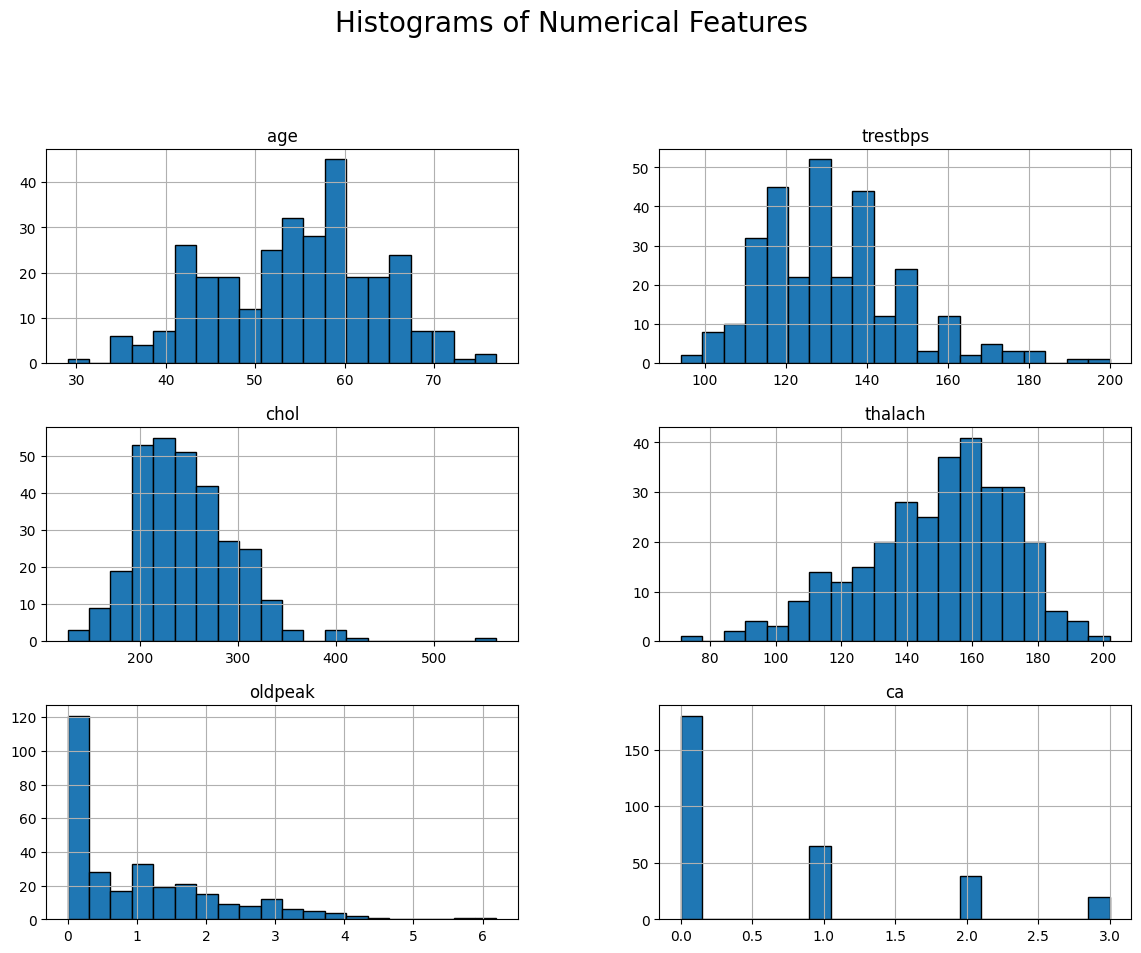

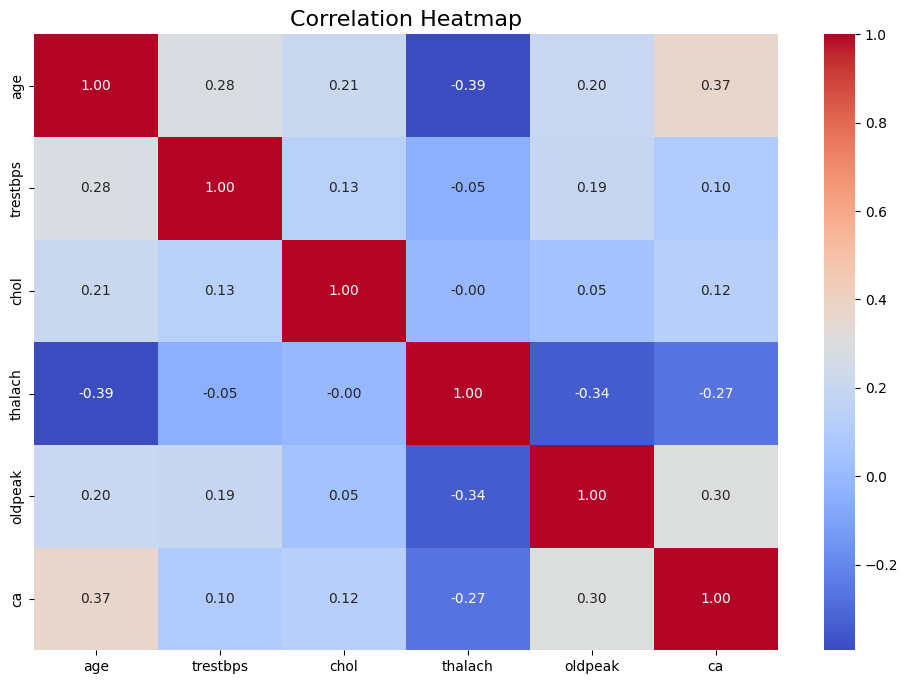

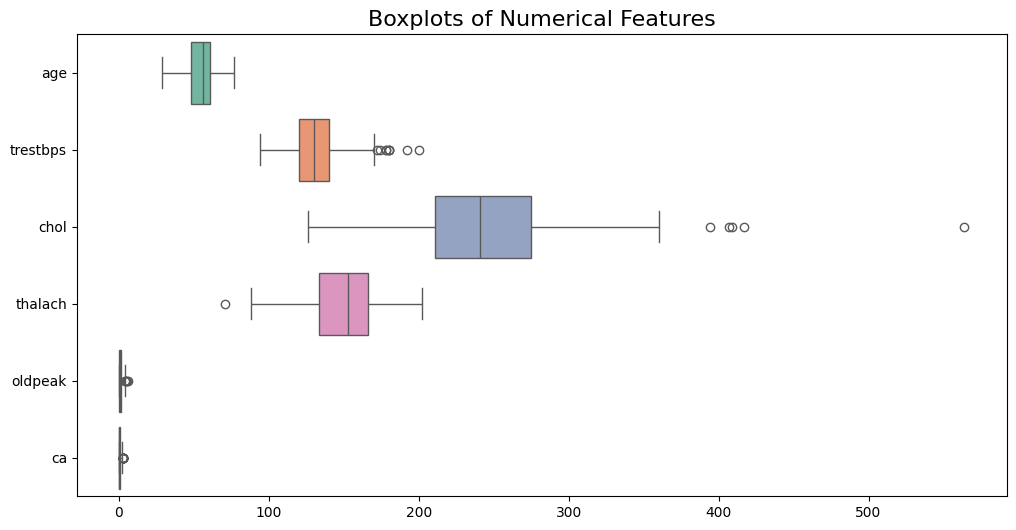

Cumulative Explained Variance: [0.19745029 0.2944418  0.37167189 0.44456381 0.50966596 0.57096269
 0.62641537 0.67953498 0.72586275 0.76901854 0.8096771  0.8459141
 0.88074337 0.91254302 0.94076676 0.96448912 0.98321182 1.
 1.         1.         1.         1.        ]


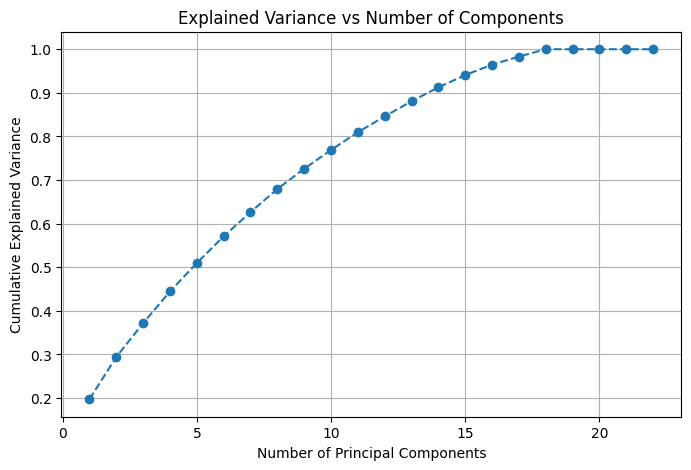

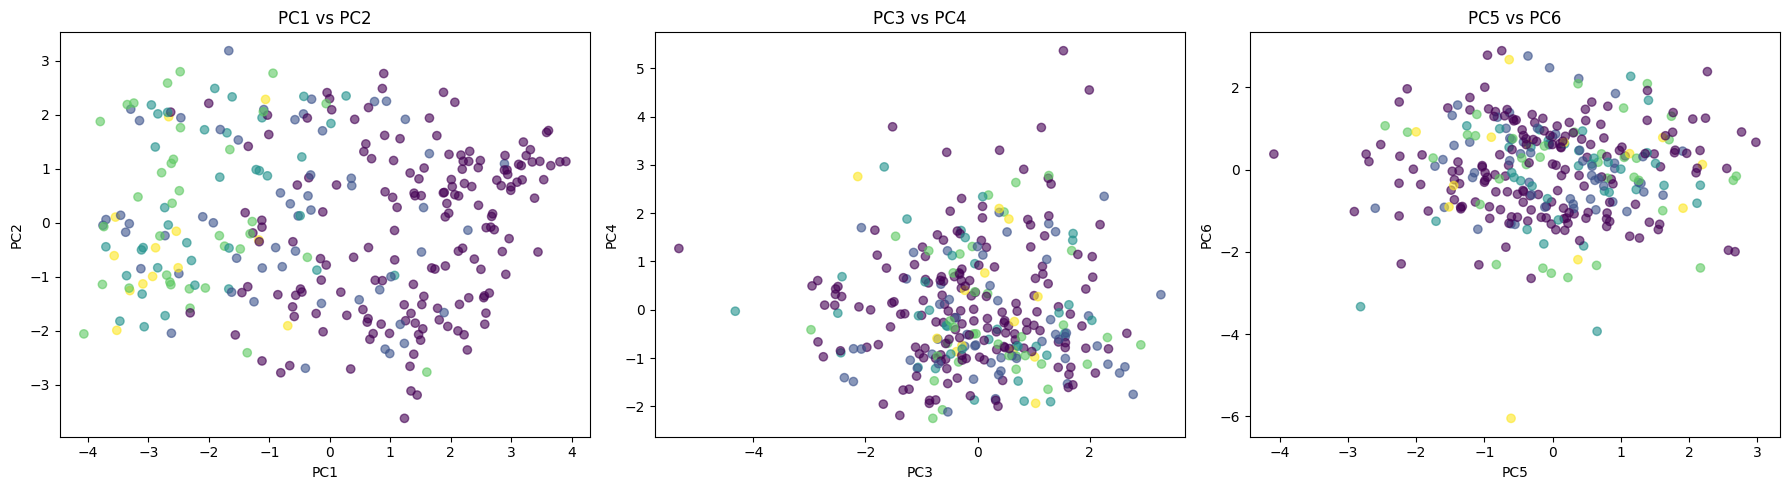

In [7]:
# 02_pca_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Load preprocessed dataset ---
df_clean = pd.read_csv("heart_disease_clean.csv")

# -------------------------------
# EDA: Histograms, Heatmap, Boxplots
# -------------------------------
categorical_cols = ["sex", "cp_1","cp_2","cp_3","cp_4", 
                    "fbs", "restecg_0", "restecg_1", "restecg_2", 
                    "exang", "slope_1","slope_2","slope_3", 
                    "thal_3", "thal_6", "thal_7", "num"]  # num is target
numeric_cols = [col for col in df_clean.columns if col not in categorical_cols]

# Histograms of numerical features
df_clean[numeric_cols].hist(bins=20, edgecolor="black", figsize=(14, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=20, y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.show()

# -------------------------------
# PCA Analysis
# -------------------------------
X = df_clean.drop("num", axis=1)   # features only
y = df_clean["num"]

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Full PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance,
         marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

# Reduced PCA (example: 6 components)
pca = PCA(n_components=6)
X_reduced = pca.fit_transform(X_scaled)
X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(6)])
X_reduced_df["num"] = y.values

# Scatter plots of principal components
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_reduced_df["PC1"], X_reduced_df["PC2"], c=X_reduced_df["num"], cmap="viridis", alpha=0.6)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PC1 vs PC2")

plt.subplot(1, 3, 2)
plt.scatter(X_reduced_df["PC3"], X_reduced_df["PC4"], c=X_reduced_df["num"], cmap="viridis", alpha=0.6)
plt.xlabel("PC3"); plt.ylabel("PC4"); plt.title("PC3 vs PC4")

plt.subplot(1, 3, 3)
plt.scatter(X_reduced_df["PC5"], X_reduced_df["PC6"], c=X_reduced_df["num"], cmap="viridis", alpha=0.6)
plt.xlabel("PC5"); plt.ylabel("PC6"); plt.title("PC5 vs PC6")

plt.tight_layout()
plt.show()
